<a href="https://colab.research.google.com/github/SinSham/Fake-News-Detection-Project/blob/main/Fake_News_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv('/content/train.csv')

In [45]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


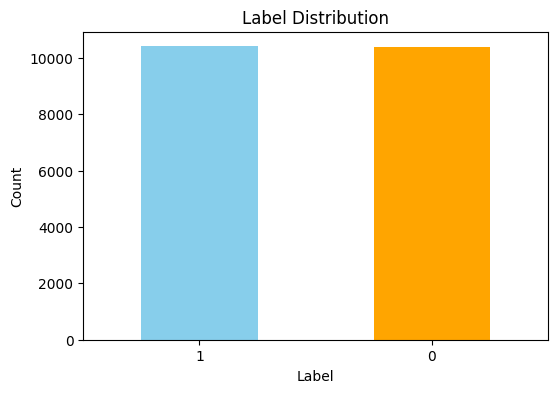

In [46]:
label_distribution = df['label'].value_counts()
plt.figure(figsize=(6, 4))
label_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [47]:
## Get the Independent Features

X=df.drop('label',axis=1)

## Get the Dependent features

y=df['label']

In [48]:
df.shape

(20800, 5)

In [49]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [50]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [51]:
df=df.dropna()
messages=df.copy()
messages.reset_index(inplace=True)

In [52]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [53]:
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [54]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower() # for consistency
    review = review.split() # tokenization

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [56]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [57]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [58]:
y=messages['label']

In [59]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [61]:
tfidf_v.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [62]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [64]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names_out())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.305244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
from sklearn import metrics
import numpy as np
import itertools

In [66]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [67]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.881
Confusion matrix, without normalization


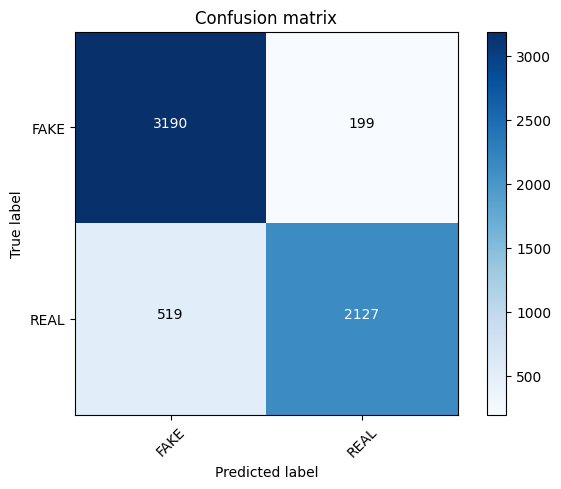

In [68]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [69]:
classifier.feature_log_prob_[0]

array([ -8.59653268,  -8.64056233,  -9.63025005, ...,  -9.37500293,
       -10.17387272,  -8.96116825])

In [74]:
feature_names = tfidf_v.get_feature_names_out()

In [75]:
### Most real
sorted(zip(classifier.feature_log_prob_[0], feature_names ), reverse=True)[:20]

[(-3.9688198638901717, 'new'),
 (-3.988003702906073, 'york'),
 (-3.9880885544232214, 'new york'),
 (-3.9919484084725525, 'time'),
 (-3.998920003170758, 'york time'),
 (-3.998920003170758, 'new york time'),
 (-4.6404469452529735, 'breitbart'),
 (-4.8166923560844985, 'trump'),
 (-5.684482617659803, 'donald'),
 (-5.6872485512802875, 'donald trump'),
 (-6.063598621807053, 'say'),
 (-6.261567631114529, 'obama'),
 (-6.340556753751713, 'presid'),
 (-6.369870473420658, 'state'),
 (-6.373148515311513, 'attack'),
 (-6.405936015966153, 'report'),
 (-6.465735789194304, 'hous'),
 (-6.475846112060369, 'clinton'),
 (-6.553789626407744, 'brief'),
 (-6.593770707422272, 'kill')]

In [76]:
### Most fake
sorted(zip(classifier.feature_log_prob_[0], feature_names))[:50]

[(-10.17387271811384, 'access pipelin protest'),
 (-10.17387271811384, 'acknowledg emf'),
 (-10.17387271811384, 'acknowledg emf damag'),
 (-10.17387271811384, 'acquit'),
 (-10.17387271811384, 'acr'),
 (-10.17387271811384, 'adhd'),
 (-10.17387271811384, 'airstrik kill'),
 (-10.17387271811384, 'al nusra'),
 (-10.17387271811384, 'america last'),
 (-10.17387271811384, 'america vote'),
 (-10.17387271811384, 'american concern'),
 (-10.17387271811384, 'american concern elect'),
 (-10.17387271811384, 'american peopl defeat'),
 (-10.17387271811384, 'aqsa'),
 (-10.17387271811384, 'arabian'),
 (-10.17387271811384, 'ariel noyola'),
 (-10.17387271811384, 'ariel noyola rodr'),
 (-10.17387271811384, 'ask question'),
 (-10.17387271811384, 'auf'),
 (-10.17387271811384, 'avail'),
 (-10.17387271811384, 'babi powder'),
 (-10.17387271811384, 'bad news'),
 (-10.17387271811384, 'badg'),
 (-10.17387271811384, 'ballot'),
 (-10.17387271811384, 'baltic'),
 (-10.17387271811384, 'banana'),
 (-10.17387271811384, 'b